In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2020-06.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.937999,6.880744,50.932070,6.988177,2020-06-29 12:19:02,2020-06-30 14:48:02,1589.0,7560.0,10973725,31775314,0.0,NaN,BIKE 22731,1092
1,50.932070,6.988177,50.937345,6.999014,2020-06-30 17:34:02,2020-06-30 17:45:02,11.0,960.0,31775314,31786598,166.0,NaN,BIKE 22731,1109
2,50.937345,6.999014,50.932063,6.988328,2020-06-30 17:51:01,2020-06-30 17:59:01,8.0,952.0,31786598,31787660,6.0,NaN,BIKE 22731,1106
3,50.932063,6.988328,50.929115,6.998305,2020-06-30 18:51:01,2020-06-30 19:04:01,13.0,772.0,31787660,31792269,52.0,NaN,BIKE 22731,1110
4,50.929115,6.998305,50.912679,6.947726,2020-06-30 19:43:01,2020-06-30 20:07:02,24.0,3990.0,31792269,31796586,39.0,NaN,BIKE 22731,1112


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

71586

In [14]:
len(out_distances_total)

9130

In [15]:
len(out_rides)

8550

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

12748

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

4932

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

11.0       63
15.0       58
10.0       57
9.0        56
8.0        53
13.0       52
6.0        51
4.0        51
23.0       51
14.0       50
12.0       46
24.0       46
7.0        46
17.0       45
19.0       45
32.0       45
21.0       45
16.0       44
18.0       44
5.0        42
33.0       42
35.0       41
20.0       41
22.0       41
30.0       41
25.0       40
26.0       40
27.0       39
28.0       38
555.0      38
           ..
9244.0      1
4259.0      1
9531.0      1
9523.0      1
5079.0      1
5687.0      1
5342.0      1
9525.0      1
6189.0      1
5151.0      1
4624.0      1
5522.0      1
6589.0      1
8384.0      1
5277.0      1
5630.0      1
9624.0      1
4948.0      1
11111.0     1
3813.0      1
5581.0      1
7526.0      1
6421.0      1
6509.0      1
5692.0      1
6466.0      1
6009.0      1
5786.0      1
5772.0      1
6714.0      1
Name: distance, Length: 6804, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

4198

In [23]:
len(out_distances + out_rides)

12748

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

17.80795127538904


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58838 entries, 0 to 58837
Data columns (total 15 columns):
index                   58838 non-null int64
lat_begin               58838 non-null float64
lng_begin               58838 non-null float64
lat_end                 58838 non-null float64
lng_end                 58838 non-null float64
ride_begin              58838 non-null object
ride_end                58838 non-null object
ride_time               58838 non-null float64
distance                58838 non-null float64
uid_begin               58838 non-null int64
uid_end                 58838 non-null int64
standing_before_ride    58838 non-null float64
address                 234 non-null object
name                    58838 non-null object
available_bikes         58838 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 6.7+ MB


In [27]:
df_c['distance'].value_counts()

555.0      38
511.0      36
765.0      35
1019.0     35
402.0      35
622.0      35
1012.0     33
472.0      32
627.0      32
450.0      32
981.0      32
779.0      32
978.0      32
970.0      32
699.0      31
544.0      31
994.0      31
1063.0     31
653.0      31
1290.0     31
639.0      30
1142.0     30
834.0      30
1381.0     30
552.0      30
755.0      30
583.0      30
810.0      30
539.0      30
871.0      30
           ..
4428.0      1
6857.0      1
5152.0      1
5492.0      1
6305.0      1
4229.0      1
7159.0      1
5749.0      1
7600.0      1
8573.0      1
7373.0      1
6193.0      1
5038.0      1
6673.0      1
12262.0     1
7520.0      1
4850.0      1
6251.0      1
8577.0      1
5185.0      1
8581.0      1
6367.0      1
6338.0      1
7800.0      1
5073.0      1
8583.0      1
5934.0      1
6498.0      1
5829.0      1
6714.0      1
Name: distance, Length: 6594, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

11.0     2082
12.0     2058
9.0      2019
10.0     1982
8.0      1969
13.0     1909
14.0     1887
16.0     1819
7.0      1801
17.0     1776
15.0     1762
18.0     1600
19.0     1548
6.0      1489
21.0     1484
20.0     1476
22.0     1348
23.0     1299
25.0     1224
24.0     1207
27.0     1059
26.0     1027
28.0      981
30.0      893
29.0      872
5.0       862
31.0      792
32.0      692
33.0      661
34.0      598
         ... 
529.0       1
568.0       1
679.0       1
495.0       1
481.0       1
585.0       1
645.0       1
557.0       1
644.0       1
696.0       1
571.0       1
667.0       1
624.0       1
370.0       1
688.0       1
465.0       1
669.0       1
555.0       1
589.0       1
559.0       1
454.0       1
678.0       1
441.0       1
451.0       1
647.0       1
650.0       1
342.0       1
324.0       1
670.0       1
592.0       1
Name: ride_time, Length: 659, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[43,
 46,
 85,
 130,
 140,
 146,
 169,
 204,
 205,
 276,
 304,
 361,
 375,
 445,
 455,
 509,
 513,
 523,
 546,
 552,
 586,
 612,
 715,
 733,
 738,
 783,
 831,
 846,
 904,
 905,
 907,
 920,
 964,
 965,
 1012,
 1053,
 1064,
 1095,
 1267,
 1326,
 1354,
 1369,
 1555,
 1591,
 1622,
 1623,
 1629,
 1663,
 1664,
 1696,
 1713,
 1749,
 1786,
 1793,
 1824,
 1890,
 1905,
 1916,
 1921,
 2050,
 2112,
 2130,
 2147,
 2148,
 2209,
 2220,
 2233,
 2245,
 2292,
 2378,
 2492,
 2535,
 2548,
 2579,
 2618,
 2674,
 2706,
 2798,
 2808,
 2882,
 2900,
 2906,
 2926,
 2934,
 2948,
 2972,
 3121,
 3145,
 3170,
 3171,
 3200,
 3202,
 3238,
 3246,
 3251,
 3284,
 3376,
 3440,
 3447,
 3498,
 3553,
 3570,
 3615,
 3623,
 3663,
 3715,
 3737,
 3739,
 3824,
 3836,
 3877,
 3886,
 3887,
 3893,
 3995,
 4038,
 4047,
 4099,
 4132,
 4150,
 4167,
 4195,
 4196,
 4251,
 4267,
 4303,
 4429,
 4439,
 4539,
 4627,
 4825,
 4826,
 4890,
 4891,
 4982,
 5016,
 5128,
 5168,
 5170,
 5204,
 5208,
 5217,
 5246,
 5293,
 5298,
 5310,
 5333,
 5397,
 

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
43,50,50.919766,6.931308,50.918911,6.934028,2020-06-14 11:29:01,2020-06-14 12:21:01,52.0,213.0,31007162,31018328,531.0,NaN,BIKE 21155,1095
46,53,50.955864,6.906275,50.955869,6.910048,2020-06-15 10:36:02,2020-06-15 15:06:02,270.0,264.0,31029343,31065658,1071.0,NaN,BIKE 21155,1126
85,103,50.970127,6.884238,50.968073,6.885449,2020-06-06 13:22:01,2020-06-06 13:40:02,18.0,244.0,30422464,30679782,8002.0,NaN,BIKE 21596,1058
130,159,50.968885,6.939534,50.969469,6.936438,2020-06-23 12:06:02,2020-06-23 14:20:01,134.0,226.0,31406486,31424140,583.0,NaN,BIKE 22401,1138
140,172,50.970378,6.915817,50.972762,6.914027,2020-06-29 18:29:02,2020-06-29 18:36:01,7.0,293.0,31487789,31737772,7219.0,NaN,BIKE 22401,1147
146,178,50.892038,7.017197,50.891242,7.020109,2020-06-01 16:59:02,2020-06-02 00:08:02,429.0,223.0,30491172,30515237,50.0,NaN,BIKE 22763,1063
169,207,50.984333,6.944254,50.983519,6.947800,2020-06-12 16:25:04,2020-06-12 21:45:02,320.0,264.0,30917168,30952514,310.0,NaN,BIKE 22763,1112
204,245,50.944197,6.936474,50.942250,6.935422,2020-06-22 17:49:02,2020-06-22 17:53:01,4.0,229.0,31380688,31385556,72.0,NaN,BIKE 22763,1146
205,246,50.942250,6.935422,50.943887,6.936700,2020-06-22 18:00:02,2020-06-22 18:05:01,5.0,203.0,31385556,31386402,7.0,NaN,BIKE 22763,1138
276,341,50.896254,6.966726,50.894022,6.967109,2020-06-05 09:42:01,2020-06-05 09:56:02,14.0,250.0,30599369,30643916,1533.0,NaN,BIKE 21822,1090


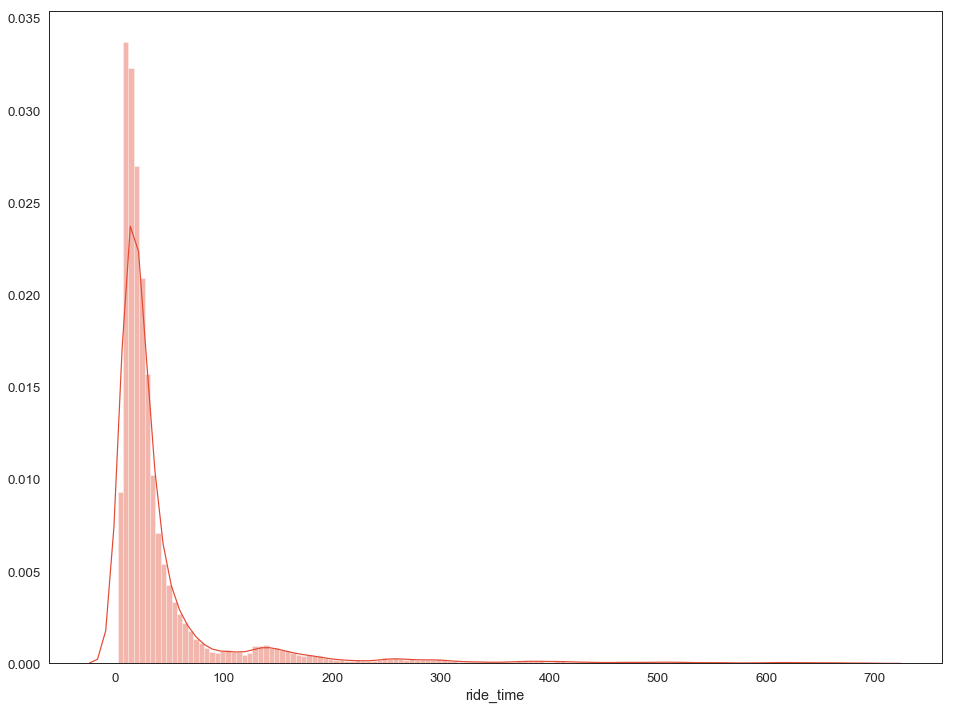

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

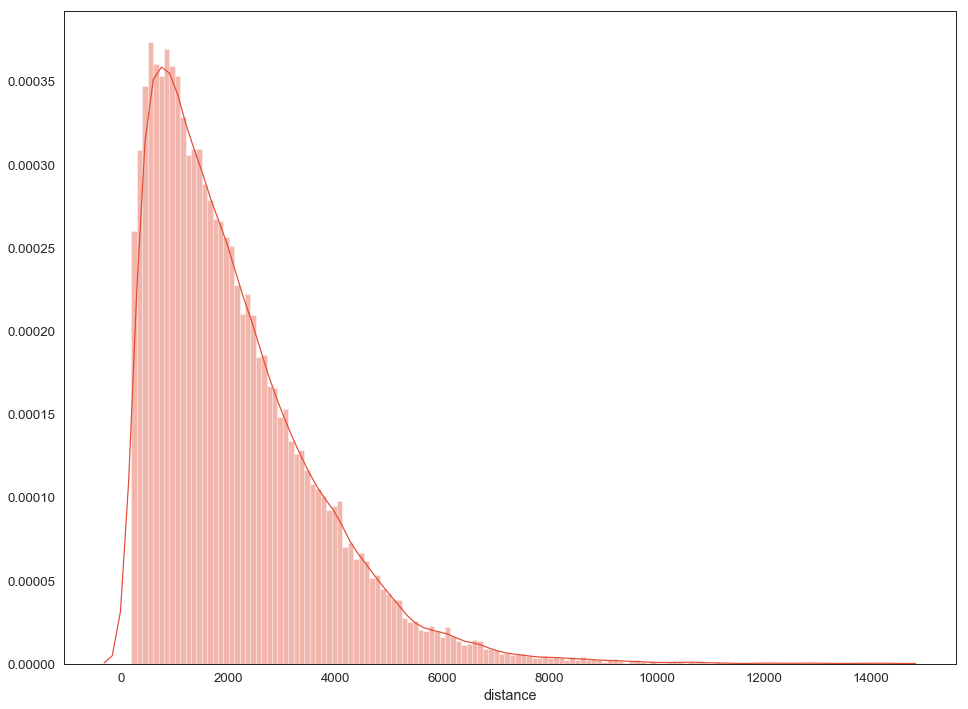

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
331,413,50.951359,6.911974,50.954240,6.968258,2020-06-14 10:42:01,2020-06-14 15:56:02,314.0,3957.0,30997783,31017324,795.0,Herbrandstraße 9 50825 Köln,BIKE 22258,1121
685,834,50.941303,6.958138,50.922146,6.932724,2020-06-14 17:18:02,2020-06-14 17:54:01,36.0,2777.0,31019937,31032089,275.0,Kölner Dom,BIKE 22368,1124
1017,1208,50.947824,6.951745,50.952295,6.952109,2020-06-21 01:49:01,2020-06-21 09:52:01,483.0,498.0,31311842,31317682,121.0,Ritterstr. 40,BIKE 22171,1102
1060,1271,50.951953,7.018783,50.939037,6.978508,2020-06-11 10:01:01,2020-06-11 10:15:02,14.0,3167.0,30806214,30870721,2331.0,Köln - Beuthener Str.,BIKE 21587,1079
1385,1665,50.933693,6.962553,50.936686,6.945987,2020-06-17 17:57:01,2020-06-17 18:12:02,15.0,1208.0,31157214,31172918,292.0,"Filzengraben 32, 50676 Köln",BIKE 21179,1096
1400,1685,50.946306,6.997561,50.943533,7.001239,2020-06-25 17:34:01,2020-06-25 20:48:01,194.0,402.0,31513951,31551754,486.0,Istanbulstraße 18,BIKE 21179,1175
1559,1877,50.938487,6.962832,50.918202,6.977167,2020-06-27 16:42:01,2020-06-27 17:53:01,71.0,2470.0,31622302,31646317,505.0,Lintgasse,BIKE 21031,1179
1675,2011,50.919702,6.962691,50.935116,6.960392,2020-06-13 14:48:02,2020-06-13 15:09:02,21.0,1722.0,30970700,30982223,45.0,Alteburgerstr. 26,BIKE 22041,1086
2570,3113,50.932979,6.996698,50.943292,6.919823,2020-06-26 07:04:01,2020-06-26 11:15:01,251.0,5509.0,31540565,31575641,766.0,Taunusstr. 22,BIKE 22734,1157
3025,3636,50.982554,6.945914,50.975626,6.897334,2020-06-15 06:46:02,2020-06-15 07:06:02,20.0,3488.0,31023935,31051360,719.0,Floriangasse 29,BIKE 22253,1135


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
803,963,50.937226,6.998526,50.935290,6.994003,2020-06-06 16:12:02,2020-06-06 16:17:02,5.0,383.0,30687383,30687728,1.0,NaN,BIKE 22472,1065
804,964,50.935290,6.994003,50.936455,6.988855,2020-06-06 16:26:02,2020-06-06 16:32:01,6.0,383.0,30687728,30688440,9.0,NaN,BIKE 22472,1063
3652,4349,50.960155,6.876870,50.965389,6.883603,2020-06-22 09:07:02,2020-06-22 09:14:01,7.0,749.0,31201347,31363880,5633.0,NaN,BIKE 22444,1163
3653,4350,50.965389,6.883603,50.960188,6.876813,2020-06-22 18:24:01,2020-06-22 18:31:02,7.0,749.0,31363880,31388110,550.0,NaN,BIKE 22444,1141
3792,4543,50.921876,6.904614,50.925928,6.927811,2020-06-16 12:46:02,2020-06-16 15:03:02,137.0,1688.0,31106204,31109065,17.0,NaN,BIKE 21648,1115
3793,4545,50.925869,6.928102,50.939101,6.939894,2020-06-16 18:16:02,2020-06-16 18:43:02,27.0,1688.0,31114085,31125567,192.0,NaN,BIKE 21648,1124
4222,5076,50.931798,6.944756,50.937011,6.953858,2020-06-24 07:07:01,2020-06-24 07:38:01,31.0,862.0,31458984,31462011,129.0,NaN,BIKE 21508,1151
4223,5077,50.937011,6.953858,50.931247,6.945645,2020-06-24 07:50:01,2020-06-24 07:58:02,8.0,862.0,31462011,31463218,12.0,NaN,BIKE 21508,1156
5069,6054,50.915023,6.993624,50.926057,7.007932,2020-06-18 16:15:03,2020-06-18 16:28:01,13.0,1585.0,31211764,31214291,36.0,NaN,BIKE 22778,1172
5070,6055,50.926057,7.007932,50.915105,6.993467,2020-06-18 16:53:01,2020-06-18 17:03:01,10.0,1585.0,31214291,31216210,25.0,NaN,BIKE 22778,1167


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
2679,3242,50.976938,6.961986,50.962851,6.952420,2020-06-16 13:58:01,2020-06-16 14:01:02,3.0,1704.0,31111147,31111411,3.0,NaN,BIKE 22942,1109,1500.0
2981,3590,50.933113,6.902073,50.888018,7.043433,2020-06-15 12:52:01,2020-06-15 13:11:02,19.0,11111.0,30986207,31062501,1198.0,NaN,BIKE 22737,1126,9000.0
5669,6729,50.936326,6.911187,50.937489,6.934627,2020-06-27 10:46:02,2020-06-27 10:49:02,3.0,1648.0,31603568,31625907,867.0,NaN,BIKE 21607,1152,1500.0
17327,21037,50.998200,6.902132,50.975453,6.973617,2020-06-25 21:27:02,2020-06-25 21:30:02,3.0,5608.0,31527656,31554265,400.0,NaN,BIKE 21664,1152,1500.0
18525,22475,50.975079,6.946702,50.963952,7.001109,2020-06-20 16:51:02,2020-06-20 16:58:01,7.0,4007.0,31269780,31297717,1172.0,NaN,BIKE 22721,1168,4000.0
24411,29721,50.952712,6.902104,50.968464,6.907939,2020-06-24 09:48:01,2020-06-24 09:50:02,2.0,1799.0,31330930,31466564,4034.0,NaN,BIKE 21367,1136,1500.0
24945,30423,50.922703,6.990703,50.958039,7.003945,2020-06-17 16:42:01,2020-06-17 16:45:02,3.0,4038.0,31163669,31167290,61.0,NaN,BIKE 22228,1137,1500.0
29376,35715,50.966706,6.953071,50.949880,6.951171,2020-06-28 23:23:02,2020-06-28 23:25:02,2.0,1876.0,31635643,31708223,1964.0,NaN,BIKE 22284,1163,1500.0
29828,36323,50.940596,6.892303,50.934736,6.948966,2020-06-02 13:45:02,2020-06-02 13:53:02,8.0,4025.0,30527951,30530166,58.0,NaN,BIKE 21717,1074,4000.0
32446,39405,50.925107,6.922982,50.968734,6.939957,2020-06-27 02:50:01,2020-06-27 02:54:02,4.0,4996.0,31580326,31618476,814.0,NaN,BIKE 22062,1146,4000.0


In [46]:
len(unmatched_distances)

22

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                              58583
Kölner Dom                                           2
Breslauer Platz                                      1
Hohenstaufenring 78,                                 1
Bonnerstraße 17                                      1
Heumarkt                                             1
Ferdinandstraße                                      1
Köln - Vogesenstr. 42                                1
Köln - Maibachstr. 115                               1
Matthiaskirchplatz 16-18                             1
Mauritiuswall 46-62                                  1
Sebastianstr. 72                                     1
Sülzburgstraße 92, 50937 Köln                        1
An der Eiche 1                                       1
Poll-Vingster Straße & Roddergasse 51105 Köln        1
Köln - Quentelstr. 19                                1
Weiden Zentrum                                       1
Frankfurter Straße 60 51065                          1
50.930872,

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-06.csv', sep=';', index=False) 

In [52]:
len(df_c)

58816